In [1]:
import pandas as pd
import seaborn as sns
import os
import random
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import warnings
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from adjustText import adjust_text
import itertools
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

In [2]:
dir_everyday = '/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/data/processed_12-15-data/everydaySound_rating.csv' 

In [3]:
# Load the CSV file
df = pd.read_csv(dir_everyday)

# Function to rename the names by removing '_3ms.wav'
def rename_sound(sound_name_with_ext):
    return sound_name_with_ext.replace('_3ms.wav', '')  # Remove the extension

# Rename sounds in 'Spreadsheet: A' and 'Spreadsheet: B'
df['Spreadsheet: A'] = df['Spreadsheet: A'].apply(rename_sound)
df['Spreadsheet: B'] = df['Spreadsheet: B'].apply(rename_sound)

# Flip the ratings
df['Flipped Response'] = 6 - df['Response']

# Get unique sound names and sort them alphabetically
unique_sounds = sorted(list(set(df['Spreadsheet: A']) | set(df['Spreadsheet: B'])))

# Create a dataframe to hold the average rating for each combination
ratings_matrix = pd.DataFrame(-np.ones((len(unique_sounds), len(unique_sounds))), 
                              index=unique_sounds, columns=unique_sounds)

# Populate the matrix with average ratings
for i, sound_a in enumerate(unique_sounds):
    for j, sound_b in enumerate(unique_sounds):
        if i != j:
            # Get the average rating for this combination
            mask = (
                ((df['Spreadsheet: A'] == sound_a) & (df['Spreadsheet: B'] == sound_b)) | 
                ((df['Spreadsheet: A'] == sound_b) & (df['Spreadsheet: B'] == sound_a))
            )
            ratings = df.loc[mask, 'Flipped Response']
            avg_rating = ratings.mean() if not ratings.empty else -1
            ratings_matrix.at[sound_a, sound_b] = avg_rating
            ratings_matrix.at[sound_b, sound_a] = avg_rating  # Symmetric entry

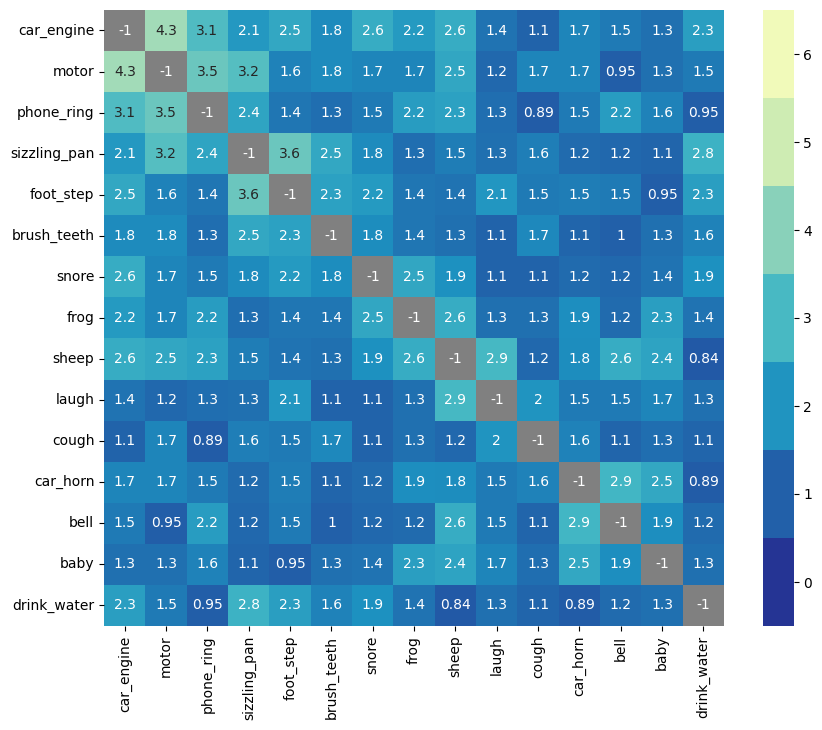

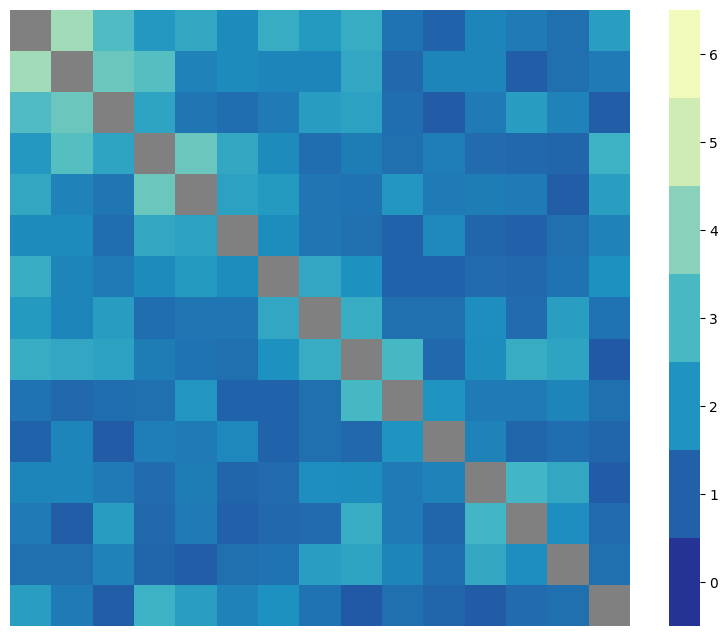

In [4]:
# Function to find the next best fit
def find_next_best_fit(current_element, remaining_elements, ratings_matrix):
    best_fit = None
    highest_similarity = -1  # Initialize with lowest possible similarity

    for element in remaining_elements:
        similarity = ratings_matrix.at[current_element, element]
        if similarity > highest_similarity:
            highest_similarity = similarity
            best_fit = element

    return best_fit

# Find the most similar pair of sounds
most_similar_pair = None
highest_similarity = -1  # Initialize with lowest possible similarity
for i, sound_a in enumerate(unique_sounds):
    for j, sound_b in enumerate(unique_sounds[i+1:], i+1):
        similarity = ratings_matrix.at[sound_a, sound_b]
        if similarity > highest_similarity:
            highest_similarity = similarity
            most_similar_pair = (sound_a, sound_b)

# Start with the most similar pair
start_order = [most_similar_pair[0], most_similar_pair[1]]

# Iteratively find the next best fit
remaining_elements = set(unique_sounds) - set(start_order)
while remaining_elements:
    last_element = start_order[-1]
    next_element = find_next_best_fit(last_element, remaining_elements, ratings_matrix)
    start_order.append(next_element)
    remaining_elements.remove(next_element)

# Reorder the ratings matrix according to the new order
ratings_matrix_reordered = ratings_matrix.loc[start_order, start_order]

# Define a custom colormap and plot the heatmap
colors_heatmap = plt.cm.YlGnBu(np.linspace(1, 0.1, 256))
colors_heatmap[0] = [0.5, 0.5, 0.5, 1]  # RGB for gray with full opacity
cmap = mcolors.LinearSegmentedColormap.from_list('custom_heatmap', colors_heatmap)

plt.figure(figsize=(10, 8))
sns.heatmap(ratings_matrix_reordered, annot=True, cmap=cmap, vmin=-1, vmax=6,
            cbar_kws={'ticks': [0, 1, 2, 3, 4, 5, 6], 'boundaries': np.arange(-0.5, 7, 1)})
plt.show()

# Plot the heatmap without labels and with the same custom colormap
plt.figure(figsize=(10, 8))
sns.heatmap(ratings_matrix_reordered, cmap=cmap, vmin=-1, vmax=6, 
            cbar_kws={'ticks': [0, 1, 2, 3, 4, 5, 6], 'boundaries': np.arange(-0.5, 7, 1)}, 
            xticklabels='', yticklabels='')

# Save the plot as SVG
save_path = '/Users/willmacbookair/Downloads/Poster plot/everyday_RSM.svg'
plt.savefig(save_path, format='svg')

plt.show()


### Normal Order

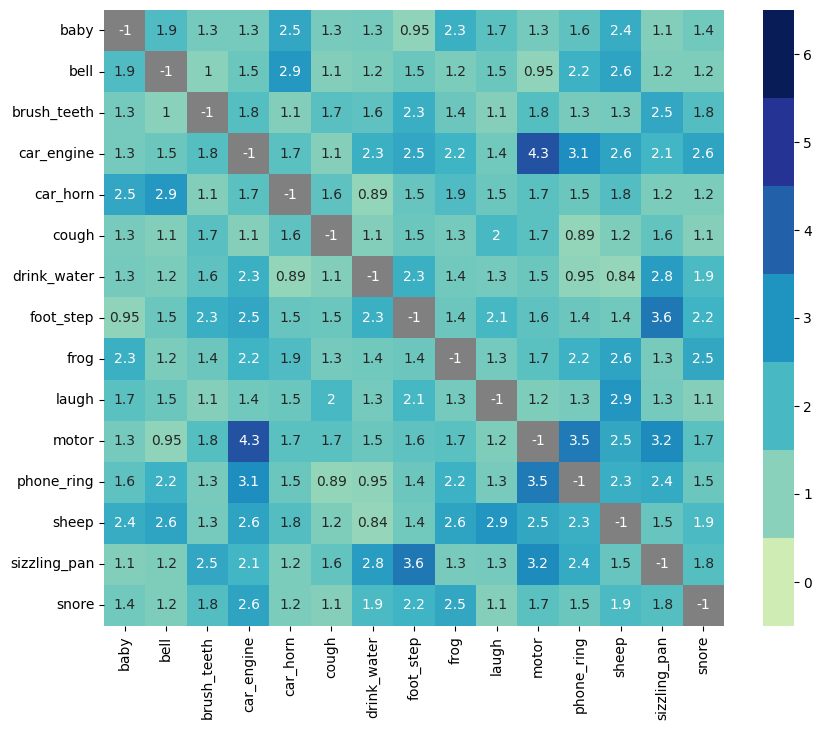

In [5]:
# Load the CSV file
df = pd.read_csv(dir_everyday)

# Function to rename the names by removing '_3ms.wav'
def rename_sound(sound_name_with_ext):
    return sound_name_with_ext.replace('_3ms.wav', '')  # Remove the extension

# Rename sounds in 'Spreadsheet: A' and 'Spreadsheet: B'
df['Spreadsheet: A'] = df['Spreadsheet: A'].apply(rename_sound)
df['Spreadsheet: B'] = df['Spreadsheet: B'].apply(rename_sound)

# Flip the ratings
df['Flipped Response'] = 6 - df['Response']

# Get unique sound names and sort them alphabetically
unique_sounds = sorted(list(set(df['Spreadsheet: A']) | set(df['Spreadsheet: B'])))

# Create a dataframe to hold the average rating for each combination
ratings_matrix = pd.DataFrame(-np.ones((len(unique_sounds), len(unique_sounds))), 
                              index=unique_sounds, columns=unique_sounds)

# Populate the matrix with average ratings
for i, sound_a in enumerate(unique_sounds):
    for j, sound_b in enumerate(unique_sounds):
        if i != j:
            # Get the average rating for this combination
            mask = (
                ((df['Spreadsheet: A'] == sound_a) & (df['Spreadsheet: B'] == sound_b)) | 
                ((df['Spreadsheet: A'] == sound_b) & (df['Spreadsheet: B'] == sound_a))
            )
            ratings = df.loc[mask, 'Flipped Response']
            avg_rating = ratings.mean() if not ratings.empty else -1
            ratings_matrix.at[sound_a, sound_b] = avg_rating
            ratings_matrix.at[sound_b, sound_a] = avg_rating  # Symmetric entry

# Define a custom colormap from blue to green
colors_heatmap = plt.cm.YlGnBu(np.linspace(0.1, 1, 256))
colors_heatmap[0] = [0.5, 0.5, 0.5, 1]  # RGB for gray with full opacity
cmap = mcolors.LinearSegmentedColormap.from_list('custom_heatmap', colors_heatmap)

# Plot the heatmap with labels and custom colormap
plt.figure(figsize=(10, 8))
sns.heatmap(ratings_matrix, annot=True, cmap=cmap, vmin=-1, vmax=6, 
            cbar_kws={'ticks': [0, 1, 2, 3, 4, 5, 6], 'boundaries': np.arange(-0.5, 7, 1)})
plt.show()

# # Plot the heatmap without labels and with the same custom colormap
# plt.figure(figsize=(10, 8))
# sns.heatmap(ratings_matrix, cmap=cmap, vmin=-1, vmax=6, 
#             cbar_kws={'ticks': [0, 1, 2, 3, 4, 5, 6], 'boundaries': np.arange(-0.5, 7, 1)}, 
#             xticklabels='', yticklabels='')
# #plt.title('Heatmap without Labels')

# save_path = os.path.join('/Users/willmacbookair/Downloads/Poster plot', "everyday_RSM.svg")
# # save the plot
# plt.savefig(save_path, format='svg')
# plt.show()